# <center>[albumentations图片增强软件包](https://github.com/albu/albumentations)

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomContrast,
    RandomGamma,
    RandomBrightness
)

In [7]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

# Load original imgs and masks

(101, 101, 3)
(101, 101)


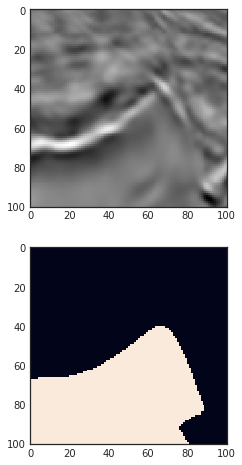

In [29]:
image = cv2.imread('train/images/0fea4b5049.png')
mask = cv2.imread('train/masks/0fea4b5049.png', 0)

print(image.shape)
print(mask.shape)

visualize(image, mask)

# 变换1: Padding¶

#### UNet type architecture require input image size be divisible by $2^N$, where $N$ is th enumber of the maxpooling layers. In the vanilla UNet $N=5$  $\Longrightarrow$ we need to pad input images to the closest divisible by $2^5 = 32$ number which is 128. This operation may be performed using [PadIfNeeded](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.PadIfNeeded) transformation. Which pads both image and mask on all four sides. Padding type (zero, constant, reflection) may be specified. Default padding is reflection padding.

(128, 128, 3) (128, 128)


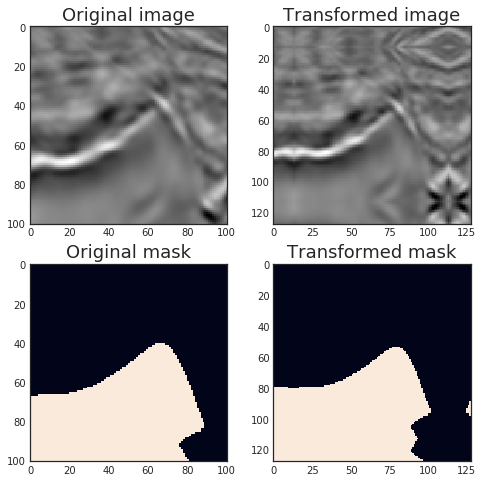

In [21]:
aug = PadIfNeeded(p=1, min_height=128, min_width=128,border_mode=4)

augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)

![](http://op4a94iq8.bkt.clouddn.com/18-10-2/85021994.jpg)

# 变换2: CenterCrop and Crop

#### To get to the original image and mask we may use [CenterCrop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.CenterCrop) or [Crop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.Crop) transformations

(101, 101, 3) (101, 101)


0

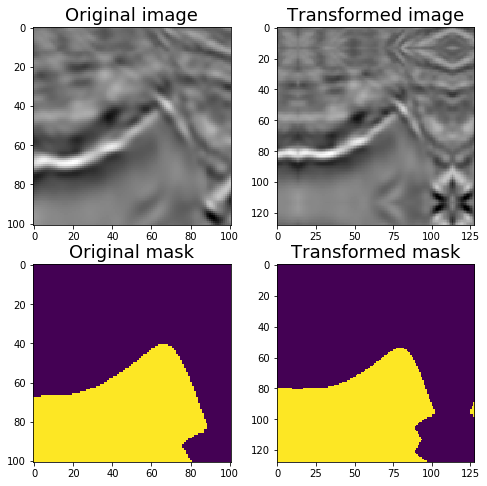

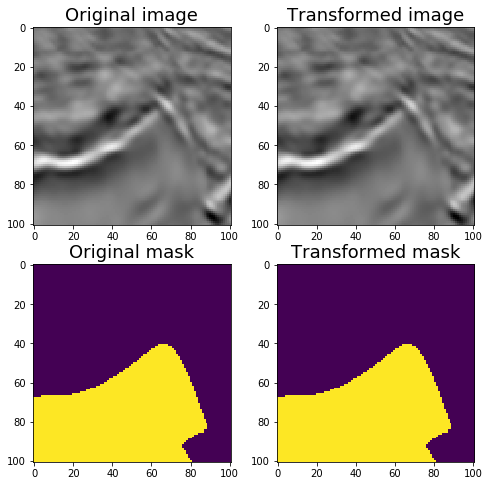

In [60]:
aug = CenterCrop(p=1, height=original_height, width=original_width)

augmented = aug(image=image_padded, mask=mask_padded) # 对填充图片进行处理

image_center_cropped = augmented['image']
mask_center_cropped = augmented['mask']

print(image_center_cropped.shape, mask_center_cropped.shape)

assert (image - image_center_cropped).sum() == 0
assert (mask - mask_center_cropped).sum() == 0

visualize(image_padded, mask_padded, original_image=image_center_cropped, original_mask=mask_center_cropped)
visualize(image_center_cropped,mask_center_cropped, original_image=image, original_mask=mask)

(101, 101, 3) (101, 101)


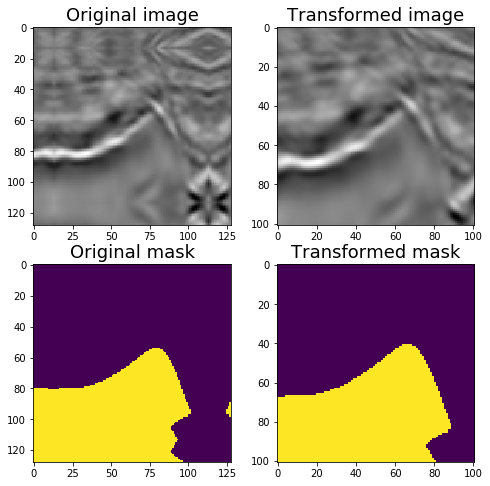

In [61]:
x_min = (128 - original_width) // 2
y_min = (128 - original_height) // 2

x_max = x_min + original_width
y_max = y_min + original_height

aug = Crop(p=1, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)

augmented = aug(image=image_padded, mask=mask_padded)

image_cropped = augmented['image']
mask_cropped = augmented['mask']

print(image_cropped.shape, mask_cropped.shape)

assert (image - image_cropped).sum() == 0
assert (mask - mask_cropped).sum() == 0

visualize(image_cropped, mask_cropped, original_image=image_padded, original_mask=mask_padded)

# 变换3: [Dihedral group变换](https://en.wikipedia.org/wiki/Dihedral_group)

### There are eight distinct ways to represent the same square on the plane.
<img src="http://op4a94iq8.bkt.clouddn.com/18-10-2/91223692.jpg" height=600 width=600></img>

### Combinations of the transformations HorizontalFlip, VerticalFlip, Transpose, RandomRotate90 will be able to get the original image to all eight states.

## HorizontalFlip

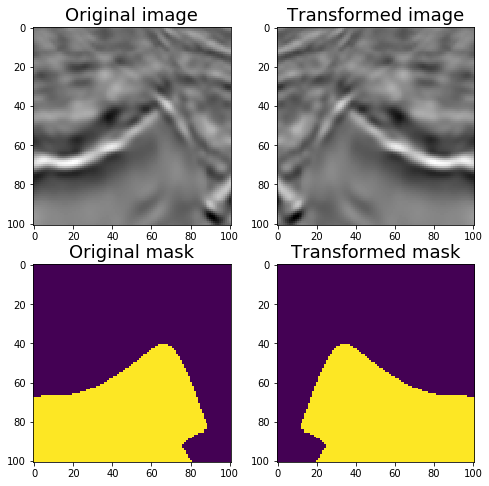

In [62]:
aug = HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

## VerticalFlip

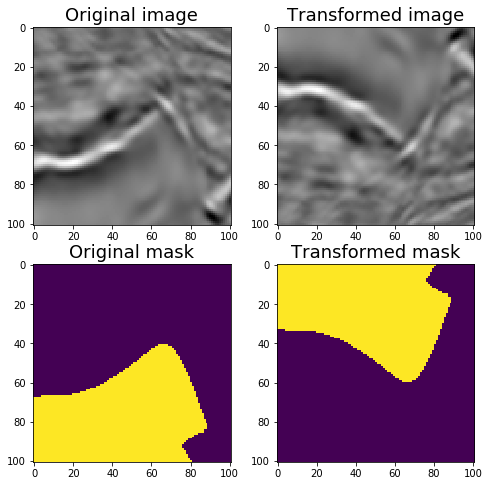

In [63]:
aug = VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

## RandomRotate90 (Randomly rotates by 0, 90, 180, 270 degrees)

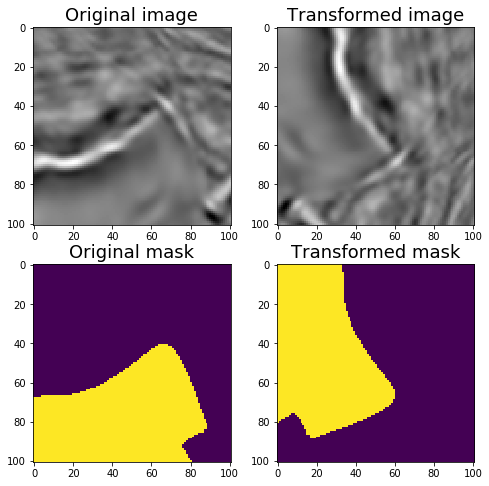

In [67]:
aug = RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)

# Transpose (switch X and Y axis)

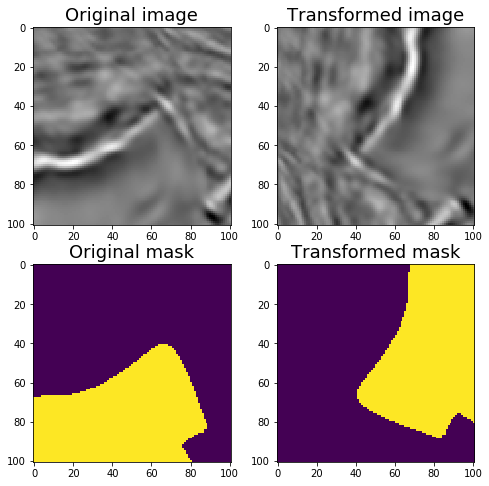

In [68]:
aug = Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)

# RandomSizedCrop

### One may combine [RandomCrop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.RandomCrop) and [RandomScale](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.RandomScale) but there is a transformation [RandomSizedCrop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.RandomSizedCrop) that allows to combine them into one transformation.

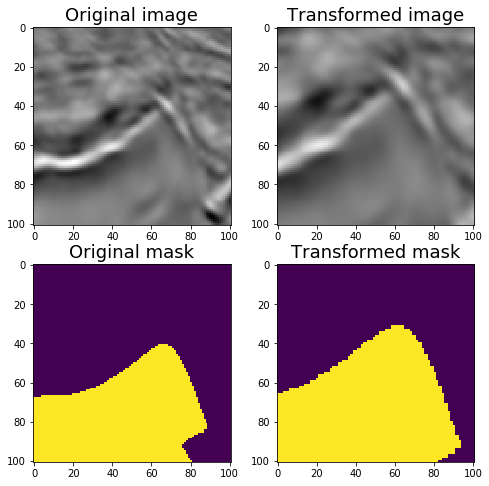

In [77]:
aug = RandomSizedCrop(p=1, min_max_height=(60, 101), height=original_height, width=original_width)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

# ShiftScaleRotate

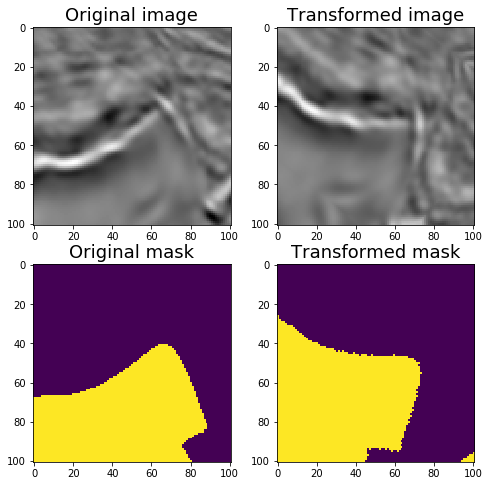

In [124]:
from albumentations import (ShiftScaleRotate)
aug = ShiftScaleRotate(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)

# 综合使用各种变换

### Light non destructive augmentations

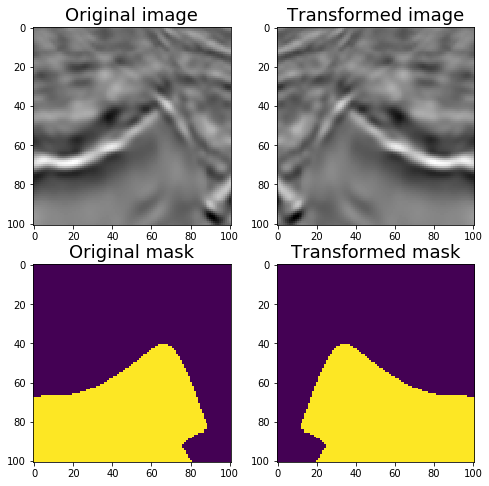

In [87]:
aug = Compose([VerticalFlip(p=1),              
              RandomRotate90(p=0.5)])

augmented = aug(image=image, mask=mask)

image_light = augmented['image']
mask_light = augmented['mask']

visualize(image_light, mask_light, original_image=image, original_mask=mask)

## Medium augmentations

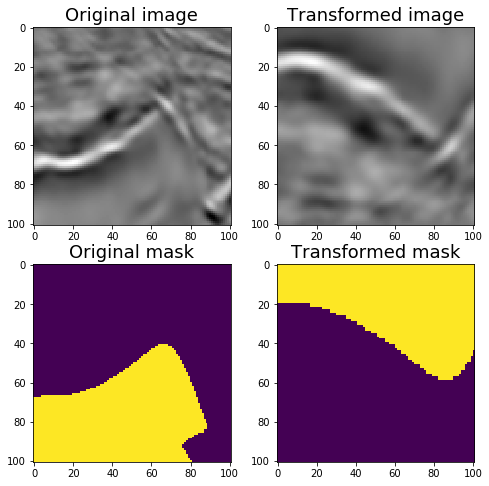

In [94]:
aug = Compose([
    OneOf([RandomSizedCrop(min_max_height=(60, 101), height=original_height, width=original_width, p=0.8),
          PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)], p=1),    
    VerticalFlip(p=0.8),              
    RandomRotate90(p=0.8),])

augmented = aug(image=image, mask=mask)

image_medium = augmented['image']
mask_medium = augmented['mask']

visualize(image_medium, mask_medium, original_image=image, original_mask=mask)

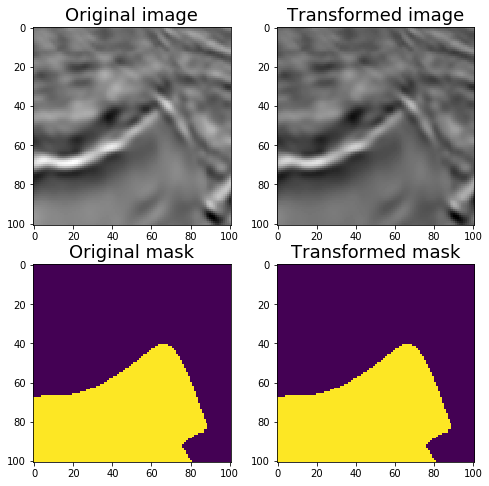

# FAQ

```bash
apt-get install libsm6
apt-get install libxrender1
apt-get install libxext-dev
```

# ---------------------------------#

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomContrast,
    RandomGamma,
    RandomBrightness,
    Resize
)

In [2]:
import os
import sys
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

%matplotlib inline

# import cv2
from sklearn.model_selection import train_test_split

from tqdm import tqdm_notebook #, tnrange
#from itertools import chain
from skimage.io import imread, imshow #, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model, save_model
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras import optimizers

import tensorflow as tf

from keras.preprocessing.image import array_to_img, img_to_array, load_img#,save_img

import time
t_start = time.time()

/mnt/ml/anaconda35/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_size_ori = 101
img_size_target = 101

def upsample(img):# not used
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_target, img_size_target), mode='constant', preserve_range=True)
    
def downsample(img):# not used
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_ori, img_size_ori), mode='constant', preserve_range=True)



In [4]:
# Loading of training/testing ids and depths
basic_path="data/tgs/"
train_df = pd.read_csv(basic_path+"train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv(basic_path+"depths.csv", index_col="id")
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

len(train_df)


4000

In [5]:
train_df["images"] = [np.array(load_img(basic_path+"TRN_images/{}.png".format(idx), color_mode = "grayscale"))
                          for idx in tqdm_notebook(train_df.index)]


A Jupyter Widget

In [6]:
train_df["masks"] = [np.array(load_img(basic_path+"TRN_masks/{}.png".format(idx), color_mode = "grayscale")) 
                         for idx in tqdm_notebook(train_df.index)]


A Jupyter Widget

In [7]:
train_df.head(10)

,z,images,masks
id,,,
575d24d81d,843,"[[134, 131, 134, 137, 136, 136, 136, 134, 123,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
a266a2a9df,794,"[[87, 96, 85, 57, 51, 92, 110, 122, 141, 141, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
75efad62c1,468,"[[145, 119, 83, 67, 70, 67, 56, 77, 113, 101, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
34e51dba6a,727,"[[138, 121, 101, 78, 52, 32, 21, 26, 47, 79, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4875705fb0,797,"[[17, 20, 23, 27, 30, 32, 34, 36, 36, 36, 38, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
782ae9b7e7,677,"[[155, 158, 158, 157, 156, 156, 157, 157, 159,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
9842f69f8d,907,"[[112, 105, 102, 116, 141, 138, 130, 139, 106,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
aa94cfb806,754,"[[129, 125, 121, 119, 119, 120, 123, 127, 130,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
50d3073821,810,"[[119, 136, 107, 83, 113, 126, 142, 128, 109, ...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [8]:
ids_train=train_df.index.values

x_train=np.array(train_df.images.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1)

y_train=np.array(train_df.masks.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1)

In [9]:
print(ids_train.shape)
print(x_train.shape)
print(y_train.shape)

(4000,)
(4000, 101, 101, 1)
(4000, 101, 101, 1)


# 循环处理每张图片



In [10]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [31]:
from keras.preprocessing.image import save_img
from albumentations import (ShiftScaleRotate,RandomCrop,RandomRotate90,Rotate,RandomScale)
import time 

aug = Compose([ #Resize(202, 202, interpolation=1, p=1),
                #PadIfNeeded(p=1, min_height=256, min_width=256),
                #RandomSizedCrop(min_max_height=(60, 90), height=101, width=101, p=1), 
                RandomRotate90(p=0.5),
                Transpose(p=0.5),
                #Rotate(10,interpolation=1,border_mode=4,p=1),
                #RandomScale(scale_limit=0.5, p=1, interpolation=1),
                
                # 插入一系列增强变换           
#                 # 还原 256-->101
#                 CenterCrop(p=1, height=202, width=202),
#                 Resize(101, 101, interpolation=1, p=1),
               
                #RandomSizedCrop(min_max_height=(160, 202), height=202, width=202, p=0.9),   
                #VerticalFlip(p=0.9),              
                ])

aug2=Compose([ #Resize(202, 202, interpolation=1, p=1),
               #PadIfNeeded(p=1, min_height=256, min_width=256),
               #HorizontalFlip(p=1),
               RandomSizedCrop(min_max_height=(80, 101), height=101, width=101, p=0.5),  
               ShiftScaleRotate(p=0.5),
                ])

# aug3=Compose([ Resize(202, 202, interpolation=1, p=1),
#                PadIfNeeded(p=1, min_height=256, min_width=256),
#                VerticalFlip(p=0.5),
#                RandomSizedCrop(min_max_height=(202, 256), height=256, width=256, p=1),                
#                 ])

result_path="DataAug/"


for idx in tqdm_notebook(range(len(x_train))):
    if idx!=-1:#%400==0:
        image=np.tile(x_train[idx],3)
        mask=y_train[idx].reshape(101,101)

        augmented = aug(image=image, mask=mask)
        image_scaled = augmented['image']
        mask_scaled = augmented['mask']

        
        augmented2 = aug2(image=image, mask=mask)
        image_scaled2 = augmented2['image']
        mask_scaled2 = augmented2['mask']

    #     augmented3 = aug3(image=image, mask=mask)

    #     image_scaled3 = augmented3['image']
    #     mask_scaled3 = augmented3['mask']



#         print(image_scaled.shape)
#         print(image_scaled2.shape)
    #     print(mask_scaled2.shape)

#         visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)
#         visualize(image_scaled2, mask_scaled2, original_image=image, original_mask=mask)
    #     print(ids_train[idx])
        



        mask=mask.reshape(101,101,1)
        mask=np.tile(mask,3)
        
        mask_scaled=mask_scaled.reshape(101,101,1)
        mask_scaled=np.tile(mask_scaled,3)
        mask_scaled2=mask_scaled2.reshape(101,101,1)
        mask_scaled2=np.tile(mask_scaled2,3)
    #     mask_scaled3=mask_scaled3.reshape(256,256,1)
    #     mask_scaled3=np.tile(mask_scaled3,3)

        save_img(result_path+"images/{}.png".format(ids_train[idx]),image)
        save_img(result_path+"masks/{}.png".format(ids_train[idx]) , mask)

        # 保存原图片
        save_img(result_path+"images/{}_aug1.png".format(ids_train[idx]),image_scaled)
        save_img(result_path+"masks/{}_aug1.png".format(ids_train[idx]) , mask_scaled)

        save_img(result_path+"images/{}_aug2.png".format(ids_train[idx]),image_scaled2)
        save_img(result_path+"masks/{}_aug2.png".format(ids_train[idx]) , mask_scaled2)

    #     save_img(result_path+"images/{}_aug2.png".format(ids_train[idx]),image_scaled3)
    #     save_img(result_path+"masks/{}_aug2.png".format(ids_train[idx]) , mask_scaled3)

        
        
    
    


A Jupyter Widget